<a href="https://colab.research.google.com/github/ya-stack/Fashion-MNIST/blob/master/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Importing necessary libraries

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense
from keras.optimizers import Adam

In [2]:
## Loading the Dataset

fashion_mnist=keras.datasets.fashion_mnist

In [3]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

In [4]:
## Scaling down the pixels to 0 and 1

train_images=train_images/255.0
test_images=test_images/255.0

In [5]:
## Checking shape of the Train Dataset

train_images.shape

(60000, 28, 28)

In [6]:
train_images1=train_images.reshape(len(train_images),28,28,1)
test_images1=test_images.reshape(len(test_images),28,28,1)

In [7]:
train_images1.shape

(60000, 28, 28, 1)

In [9]:
## Creating model

def build_model(hp):
  model=Sequential([Conv2D(filters=hp.Int('conv_1_filter',min_value=64,max_value=128,step=16),
               kernel_size=hp.Choice('conv_1_kernel',values=[3,5]),
               activation='relu',
               input_shape=(28,28,1)
  ),
Conv2D(filters=hp.Int('conv_2_filter',min_value=32,max_value=64,step=16),
       kernel_size=hp.Choice('conv_2_kernel',values=[3,5]),
       activation='relu'
       ),
keras.layers.Flatten(),
Dense(units=hp.Int('dense_1_units',min_value=32,max_value=128,step=16),
              activation='relu'),
Dense(10,activation='softmax')])
  model.compile(optimizer=Adam(hp.Choice('learning_rate',values=[1e-2,1e-3])),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [10]:
## hp.Int will create range of integers with name as 'conv1 filter',min value=64, max_value=128, step=16
## Filter_size/kernel size with size = 3 or 5
## Will apply all permutations to find best number of neurons in dense layer and optimal number of 
## filters in each convolutional layer.


In [12]:
##  The search for the best hyperparameter configuration

tuner_search=RandomSearch(build_model,objective="val_accuracy",max_trials=5,directory='output12',
                          project_name='MNIST Fashion')

In [13]:
tuner_search.search(train_images1,train_labels,epochs=2,validation_split=0.1)

Epoch 1/2
1688/1688 [==============================] - 9s 5ms/step - loss: 0.5030 - accuracy: 0.8303 - val_loss: 0.3998 - val_accuracy: 0.8580
Epoch 2/2
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3573 - accuracy: 0.8696 - val_loss: 0.3644 - val_accuracy: 0.8678


Epoch 1/2
1688/1688 [==============================] - 9s 5ms/step - loss: 0.4256 - accuracy: 0.8473 - val_loss: 0.3338 - val_accuracy: 0.8782
Epoch 2/2
1688/1688 [==============================] - 9s 5ms/step - loss: 0.2830 - accuracy: 0.8970 - val_loss: 0.2685 - val_accuracy: 0.9025


Epoch 1/2
1688/1688 [==============================] - 7s 4ms/step - loss: 0.5705 - accuracy: 0.8038 - val_loss: 0.4157 - val_accuracy: 0.8492
Epoch 2/2
1688/1688 [==============================] - 7s 4ms/step - loss: 0.4152 - accuracy: 0.8464 - val_loss: 0.4418 - val_accuracy: 0.8447


Epoch 1/2
1688/1688 [==============================] - 7s 4ms/step - loss: 0.5018 - accuracy: 0.8206 - val_loss: 0.4348 - val_accuracy: 0.8488
Epoch 2/2
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3835 - accuracy: 0.8604 - val_loss: 0.3898 - val_accuracy: 0.8575


Epoch 1/2
1688/1688 [==============================] - 10s 6ms/step - loss: 0.5262 - accuracy: 0.8310 - val_loss: 0.3906 - val_accuracy: 0.8593
Epoch 2/2
1688/1688 [==============================] - 10s 6ms/step - loss: 0.3577 - accuracy: 0.8673 - val_loss: 0.3516 - val_accuracy: 0.8702


INFO:tensorflow:Oracle triggered exit


In [14]:
## Search for the best model

model=tuner_search.get_best_models(num_models=1)[0]
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 96)        2496      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 20, 48)        115248    
_________________________________________________________________
flatten (Flatten)            (None, 19200)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                1228864   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 1,347,258
Trainable params: 1,347,258
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.fit(train_images1,train_labels,epochs=10,validation_split=0.1,initial_epoch=2)

Epoch 3/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.2327 - accuracy: 0.9141 - val_loss: 0.2528 - val_accuracy: 0.9062
Epoch 4/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.1935 - accuracy: 0.9280 - val_loss: 0.2575 - val_accuracy: 0.9055
Epoch 5/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.1579 - accuracy: 0.9415 - val_loss: 0.2842 - val_accuracy: 0.9102
Epoch 6/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.1280 - accuracy: 0.9528 - val_loss: 0.2677 - val_accuracy: 0.9173
Epoch 7/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.1028 - accuracy: 0.9627 - val_loss: 0.2987 - val_accuracy: 0.9107
Epoch 8/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0798 - accuracy: 0.9700 - val_loss: 0.3684 - val_accuracy: 0.9083
Epoch 9/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0682 - accuracy: 0.9752 - val_loss: 0.3761 - val_accuracy:

In [17]:
test_loss,test_acc=model.evaluate(test_images1,test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.4812 - accuracy: 0.9024


In [18]:
## Accuracy on Test Dataset

print("The model accuracy is {}".format(test_acc))

The model accuracy is 0.902400016784668


In [19]:
prediction=model.predict(test_images1)

In [20]:
class_names=['T_shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle-Boot']

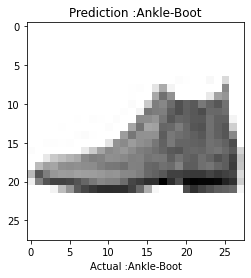

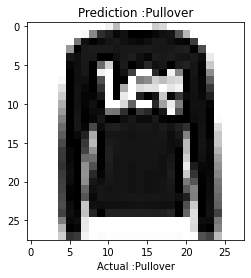

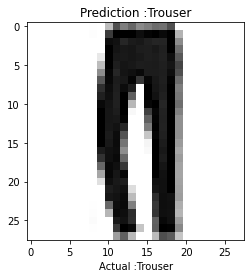

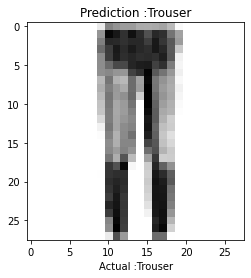

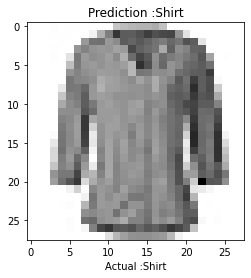

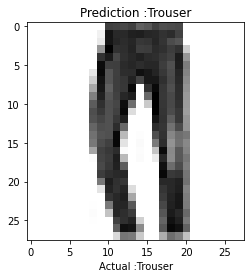

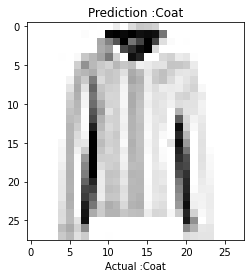

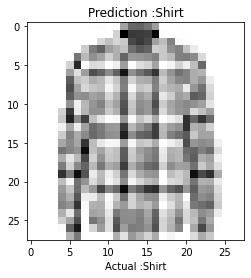

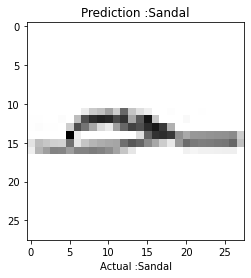

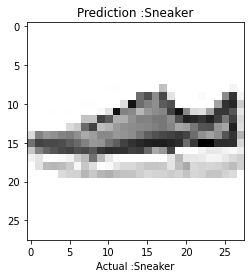

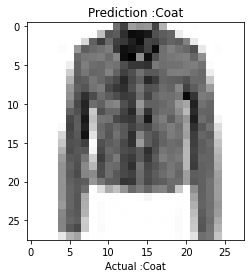

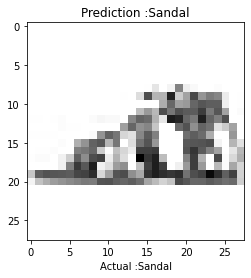

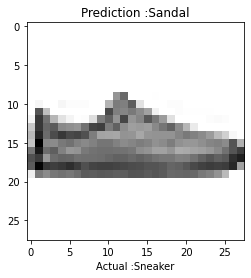

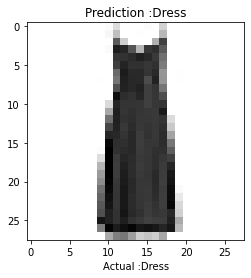

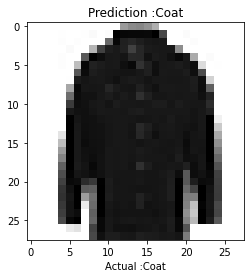

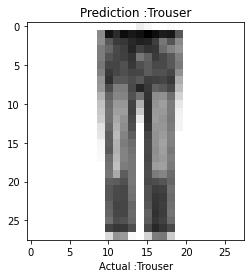

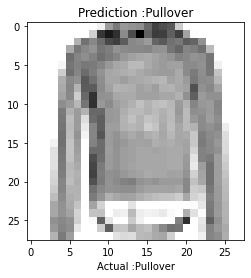

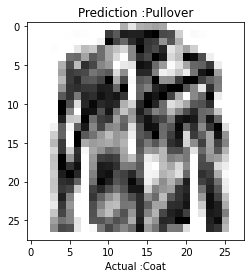

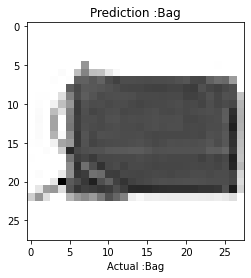

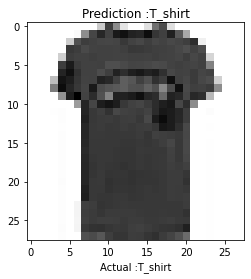

In [21]:
## Let's see the visualization of test iamges along with the comparison of test and prediction results.

for i in range(20):
  plt.grid(False)
  plt.imshow(test_images[i],cmap=plt.cm.binary)
  plt.xlabel("Actual :"+class_names[test_labels[i]])
  plt.title("Prediction :"+class_names[np.argmax(prediction[i])])
  plt.show()